<a href="https://colab.research.google.com/github/SuyeonSim/Final-Project-202301/blob/master/260212_%EB%AA%A8%EB%8F%84%EB%A6%AC_AOV_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# 1. 데이터 파일 경로 설정
# Google Drive 마운트 후 파일이 위치한 정확한 경로를 입력해주세요.
file_path = '/content/drive/MyDrive/modori-dataset/Folder-dataset/230206~260131 모도리 주문 데이터_ID있음.csv'

# 2. 데이터 로드 (Raw Data)
# 인코딩은 일반적인 한글 깨짐 방지를 위해 'utf-8-sig' 또는 'cp949'를 사용합니다.
try:
    df = pd.read_csv(file_path, encoding='utf-8-sig')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp949')

# 3. 데이터 로드 결과 확인
# 데이터의 상위 5개 행과 전체적인 정보를 확인합니다.
print("--- Data Load Success ---")
print(f"Total Rows: {len(df)}")
display(df.head())
df.info()

--- Data Load Success ---
Total Rows: 24092


,주문번호,품목별 주문번호,총 주문금액,총 결제금액,상품번호,주문상품명,주문상품명(옵션포함),수량,판매가,수령인,수령인 휴대전화,주문자ID
0,20230206-0000037,20230206-0000037-01,42000,42000,85,모도리 구들 계란말이팬,모도리 구들 계란말이팬(옵션을 선택하세요.=계란말이팬),1,39000,박상연,010-6738-0501,educosky
1,20230206-0000040,20230206-0000040-01,22900,20000,24,아롱 소담쿡웨어 3colors,"[28차 재입고] 모도리 소담쿡웨어 세트 (3종/5종/7종)(세트/단품=단품, 옵션...",1,149000,한태정,010-5386-8612,NaN
2,20230206-0000059,20230206-0000059-01,141500,0,65,모도리 소담 마그넷 조리도구 세트,"모도리 소담 마그넷 조리도구 세트(세트옵션=조리도구 세트, 구성=멀티컬러 4종 1세트)",1,62500,정가현,0502-3526-2826,NaN
3,20230206-0000059,20230206-0000059-02,141500,0,27,모도리 깔끔 도마 세트,"모도리 깔끔도마(단품/세트=세트, 구성=깔끔도마세트(도마4P+거치대) + 조약돌 마...",1,15900,정가현,0502-3526-2826,NaN
4,20230206-0000061,20230206-0000061-01,34800,0,27,모도리 깔끔 도마 세트,"모도리 깔끔도마(단품/세트=단품, 구성=딥그레이 1P)",1,15900,전계현,010-8793-9436,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   주문번호         24092 non-null  object
 1   품목별 주문번호     24092 non-null  object
 2   총 주문금액       24092 non-null  int64 
 3   총 결제금액       24092 non-null  int64 
 4   상품번호         24092 non-null  int64 
 5   주문상품명        24092 non-null  object
 6   주문상품명(옵션포함)  24092 non-null  object
 7   수량           24092 non-null  int64 
 8   판매가          24092 non-null  int64 
 9   수령인          24092 non-null  object
 10  수령인 휴대전화     23384 non-null  object
 11  주문자ID        13423 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.2+ MB


In [4]:
df.describe()

,총 주문금액,총 결제금액,상품번호,수량,판매가
count,2.409200e+04,2.409200e+04,24092.000000,24092.000000,24092.000000
mean,1.193974e+05,9.840450e+04,70.764237,1.050183,41653.831147
std,1.326902e+05,1.327392e+05,42.991966,0.840734,45434.239482
min,0.000000e+00,0.000000e+00,22.000000,0.000000,0.000000
25%,4.200000e+04,1.953000e+04,27.000000,1.000000,12000.000000
50%,7.990000e+04,6.200000e+04,58.000000,1.000000,19900.000000
75%,1.497000e+05,1.290000e+05,104.000000,1.000000,49000.000000
max,4.990000e+06,4.990000e+06,169.000000,100.000000,229000.000000


In [5]:
# 총 결제금액 = 0원인 데이터 값
# 동일한 주문번호가 각각 다른 행으로 연결되어 있으며 이는 품목별 주문번호로 확인 가능
# 주문자 ID가 NaN값인 셀이 있음

# 객단가 분석할 때는 주문번호 기준으로 데이터 통합 필요
# 상품 분석할 때는 RAW 그대로 분석 필요

### **데이터 전처리**

* 총 결제금액, 판매가 0원인 데이터 삭제
* 주문자ID가 Null값이라면 비회원으로 분류
* 주문번호를 활용해서 주문일자 컬럼 생성
* 객단가 분석을 위해 중복 주문번호 행 삭제한 데이터프레임 생성
* 상품 분석을 위한 데이터프레임 생성

In [6]:
import pandas as pd

# 1. 유효 데이터 필터링 (결제 및 판매가가 0인 데이터 제외)
# 실질적인 매출 분석을 위해 결제 금액과 판매가가 발생한 데이터만 추출합니다.
df_clean = df[(df['총 결제금액'] > 0) & (df['판매가'] > 0)].copy()

# 2. 고객 유형 분류 (주문자ID 기준)
# 비회원(NaN) 주문을 식별하기 위해 고객 유형 컬럼을 생성합니다.
df_clean['고객유형'] = df_clean['주문자ID'].apply(lambda x: '비회원' if pd.isna(x) else '회원')

# 3. 주문일자 컬럼 생성
# 주문번호를 활용한 주문일자 컬럼 생성 (YYYYMMDD 형식 파싱)
# 주문번호의 앞 8자리를 추출하여 datetime 객체로 변환합니다.
df_clean['주문일자'] = pd.to_datetime(df['주문번호'].astype(str).str[:8], format='%Y%m%d')

# ---------------------------------------------------------
# [A] 객단가(AOV) 분석을 위한 데이터 통합 (주문번호 기준)
# ---------------------------------------------------------
# 동일한 주문번호의 중복을 제거하고 주문당 '총 결제금액'을 유지합니다.
# '총 결제금액'이 주문 전체 금액인 경우를 가정하여 첫 번째 행만 남깁니다.
df_aov = df_clean.drop_duplicates(subset=['주문번호']).copy()

# ---------------------------------------------------------
# [B] 상품 분석을 위한 데이터 정제 (품목별 주문번호 기준)
# ---------------------------------------------------------
# 각 행이 개별 품목을 나타내므로 RAW 상태를 유지하되 클리닝된 데이터를 사용합니다.
df_product = df_clean.copy()

# 3. 전처리 결과 확인
print(f"✅ 전처리 완료 내역")
summary = pd.DataFrame({
    "항목": ["전체 Raw 데이터", "유효 주문 데이터(AOV용)", "유효 품목 데이터(상품분석용)", "비회원 주문 건수"],
    "Count": [len(df), len(df_aov), len(df_product), len(df_aov[df_aov['고객유형'] == '비회원'])]
})

display(summary)

# 데이터 샘플 확인
print("\n--- 객단가 분석용 데이터 (df_aov) ---")
display(df_aov[['주문번호', '총 결제금액', '고객유형']].head())

print("\n--- 상품 분석용 데이터 (df_product) ---")
display(df_product[['주문번호', '품목별 주문번호', '주문상품명', '판매가']].head())

✅ 전처리 완료 내역


,항목,Count
0,전체 Raw 데이터,24092
1,유효 주문 데이터(AOV용),12898
2,유효 품목 데이터(상품분석용),19811
3,비회원 주문 건수,5819



--- 객단가 분석용 데이터 (df_aov) ---


,주문번호,총 결제금액,고객유형
0,20230206-0000037,42000,회원
1,20230206-0000040,20000,비회원
6,20230206-0000078,79000,회원
7,20230206-0000082,362900,회원
13,20230206-0000117,457400,회원



--- 상품 분석용 데이터 (df_product) ---


,주문번호,품목별 주문번호,주문상품명,판매가
0,20230206-0000037,20230206-0000037-01,모도리 구들 계란말이팬,39000
1,20230206-0000040,20230206-0000040-01,아롱 소담쿡웨어 3colors,149000
6,20230206-0000078,20230206-0000078-01,모도리 깔끔 도마 세트,15900
7,20230206-0000082,20230206-0000082-01,[미운영] 모도리 구들 크림화이트 에디션,49000
8,20230206-0000082,20230206-0000082-02,[공식몰 단독] 모도리 BEST 세트,169000


### **최근 1년 객단가 분석**

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. 날짜 데이터 형식 변환 및 기준일 설정
df_aov['주문일자'] = pd.to_datetime(df_aov['주문일자'])
analysis_end_date = df_aov['주문일자'].max() # 데이터상의 마지막 주문일 기준
analysis_start_date = analysis_end_date - pd.DateOffset(years=1)

# 2. 최근 1년 데이터 필터링
df_aov_1y = df_aov[df_aov['주문일자'] >= analysis_start_date].copy()

# 3. 금액 구간(Bins) 및 라벨 설정
max_val = df_aov_1y['총 결제금액'].max()
bins = [0, 10000, 30000, 70000, 100000, 130000, 160000, 200000, 300000, 400000, max_val + 1]
labels = ['0-1만원', '1-3만원', '3-7만원', '7-10만원', '10-13만원', '13-16만원', '16-20만원', '20-30만원', '30-40만원', '40만원 이상']

# 4. 데이터 구간화 (Binning)
df_aov_1y['금액구간'] = pd.cut(df_aov_1y['총 결제금액'], bins=bins, labels=labels, right=False)

# 5. 구간별 통계 집계
segment_1y = df_aov_1y.groupby('금액구간', observed=True).agg(
    주문건수=('주문번호', 'count'),
    총매출액=('총 결제금액', 'sum'),
    평균결제액=('총 결제금액', 'mean')
).reset_index()

# 6. 비중 및 누적비중 계산
total_count = segment_1y['주문건수'].sum()
segment_1y['비중(%)'] = (segment_1y['주문건수'] / total_count * 100).round(2)
segment_1y['누적비중(%)'] = segment_1y['비중(%)'].cumsum().round(2)

# 7. 결과 출력
print(f"📅 분석 기간: {analysis_start_date.date()} ~ {analysis_end_date.date()}")
print(f"📊 최근 1년 주문 데이터 기준 전략적 금액 구간 분석")
display(segment_1y)

📅 분석 기간: 2025-01-31 ~ 2026-01-31
📊 최근 1년 주문 데이터 기준 전략적 금액 구간 분석


,금액구간,주문건수,총매출액,평균결제액,비중(%),누적비중(%)
0,0-1만원,1312,628562,479.086890,35.57,35.57
1,1-3만원,670,12959307,19342.249254,18.16,53.73
2,3-7만원,1032,53168361,51519.729651,27.98,81.71
3,7-10만원,286,23312626,81512.678322,7.75,89.46
4,10-13만원,194,22895349,118017.262887,5.26,94.72
5,13-16만원,87,12508059,143770.793103,2.36,97.08
6,16-20만원,71,12764793,179785.816901,1.92,99.00
7,20-30만원,28,6605622,235915.071429,0.76,99.76
8,30-40만원,6,2044400,340733.333333,0.16,99.92
9,40만원 이상,3,2278800,759600.000000,0.08,100.00


In [8]:
import pandas as pd

# 1. 금액 구간 정보를 전체 상품 데이터에 매핑
# 주문번호를 기준으로 df_aov_1y의 '금액구간' 컬럼을 df_product와 병합합니다.
df_product_segment = pd.merge(
    df_product,
    df_aov_1y[['주문번호', '금액구간']],
    on='주문번호',
    how='inner'
)

# 2. 금액 구간별 상품 판매 빈도 집계
# 구간별로 어떤 상품이 가장 많이 팔렸는지 카운트합니다.
segment_product_stats = df_product_segment.groupby(['금액구간', '주문상품명'], observed=True).size().reset_index(name='판매건수')

# 3. 구간별 판매량 기준 내림차순 정렬 및 상위 5개 추출
segment_product_stats = segment_product_stats.sort_values(['금액구간', '판매건수'], ascending=[True, False])
top_products_by_segment = segment_product_stats.groupby('금액구간').head(5)

# 4. 결과 출력
print("📊 금액 구간별 인기 구매 상품 Top 5 (최근 1년)")
for segment in top_products_by_segment['금액구간'].unique():
    print(f"\n[{segment} 구간]")
    display(top_products_by_segment[top_products_by_segment['금액구간'] == segment].reset_index(drop=True))

📊 금액 구간별 인기 구매 상품 Top 5 (최근 1년)

[0-1만원 구간]


/tmp/ipython-input-287179766.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products_by_segment = segment_product_stats.groupby('금액구간').head(5)


,금액구간,주문상품명,판매건수
0,0-1만원,[신규 회원 한정] 모도리 첫 구매 100원딜,1232
1,0-1만원,[⏰72h 타임딜] 모도리 극세사 산뜻 행주,49
2,0-1만원,모도리 깔끔 한식 가위,7
3,0-1만원,모도리 깔끔 도마 세트,6
4,0-1만원,모도리 깔끔 도마 (TPU/스텐),5



[1-3만원 구간]


,금액구간,주문상품명,판매건수
0,1-3만원,[유튜브 특가💥] 모도리 깔끔도마 2p,188
1,1-3만원,모도리 깔끔 도마 (TPU/스텐),101
2,1-3만원,[⏰72h 타임딜] 모도리 극세사 산뜻 행주,88
3,1-3만원,[⏰72h 타임딜] 모도리 깔끔 도마,85
4,1-3만원,모도리 깔끔 도마 2P,79



[3-7만원 구간]


,금액구간,주문상품명,판매건수
0,3-7만원,모도리 깔끔 도마 (TPU/스텐),417
1,3-7만원,모도리 깔끔 도마 세트,289
2,3-7만원,모도리 깔끔 도마 2P,129
3,3-7만원,[⏰72h 타임딜] 모도리 깔끔 도마,72
4,3-7만원,[유튜브 특가💥] 모도리 깔끔도마 2p,61



[7-10만원 구간]


,금액구간,주문상품명,판매건수
0,7-10만원,모도리 깔끔 도마 세트,144
1,7-10만원,모도리 깔끔 도마 (TPU/스텐),53
2,7-10만원,모도리 구들 냄비/팬 2종 세트,48
3,7-10만원,모도리 구들 냄비/팬 세트,23
4,7-10만원,모도리 깔끔 도마 2P,19



[10-13만원 구간]


,금액구간,주문상품명,판매건수
0,10-13만원,모도리 구들 냄비/팬 세트,55
1,10-13만원,모도리 깔끔 칼세트,42
2,10-13만원,모도리 소담쿡웨어 세트,34
3,10-13만원,모도리 구들 냄비/팬 2종 세트,32
4,10-13만원,모도리 깔끔 도마 세트,30



[13-16만원 구간]


,금액구간,주문상품명,판매건수
0,13-16만원,모도리 구들 냄비/팬 세트,29
1,13-16만원,모도리 구들 냄비/팬 2종 세트,15
2,13-16만원,모도리 깔끔 칼세트,14
3,13-16만원,모도리 구들 프라이팬 (24/28cm),13
4,13-16만원,모도리 구들 프라이팬 뚜껑 (24/28cm),11



[16-20만원 구간]


,금액구간,주문상품명,판매건수
0,16-20만원,모도리 깔끔 칼세트,27
1,16-20만원,모도리 구들 냄비/팬 2종 세트,22
2,16-20만원,모도리 깔끔 도마 세트,20
3,16-20만원,모도리 구들 냄비/팬 세트,16
4,16-20만원,모도리 소담쿡웨어 세트,14



[20-30만원 구간]


,금액구간,주문상품명,판매건수
0,20-30만원,모도리 깔끔 칼세트,11
1,20-30만원,모도리 깔끔 도마 세트,10
2,20-30만원,모도리 소담쿡웨어 세트,9
3,20-30만원,모도리 구들 냄비/팬 2종 세트,5
4,20-30만원,[미운영] 모도리 깔끔 스텐도마,3



[30-40만원 구간]


,금액구간,주문상품명,판매건수
0,30-40만원,모도리 깔끔 도마 세트,6
1,30-40만원,모도리 깔끔 칼세트,5
2,30-40만원,모도리 소담 마그넷 조리도구 세트,3
3,30-40만원,[미운영] 모도리 깔끔 스텐도마,2
4,30-40만원,모도리 구들 냄비/팬 세트,2



[40만원 이상 구간]


,금액구간,주문상품명,판매건수
0,40만원 이상,[미운영] 모도리 깔끔 스텐도마,1
1,40만원 이상,모도리 깔끔 도마 세트,1
2,40만원 이상,모도리 깔끔 칼세트,1
3,40만원 이상,모도리 소담쿡웨어 세트,1


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [9]:
import pandas as pd

# 1. 주문별 합구매 지표 계산 (주문번호 기준)
# 각 주문번호가 몇 개의 서로 다른 상품(nunique)을 포함하는지 계산합니다.
order_bundle_stats = df_product.groupby('주문번호').agg(
    상품종류수=('주문상품명', 'nunique'),
    총구매수량=('수량', 'sum')
).reset_index()

# 2. 금액 구간 정보 병합
# 앞서 분석한 df_aov_1y의 구간 정보를 합구매 지표와 결합합니다.
df_bundle_analysis = pd.merge(
    order_bundle_stats,
    df_aov_1y[['주문번호', '금액구간']],
    on='주문번호',
    how='inner'
)

# 3. 금액 구간별 합구매 통계 산출
# 구간별 평균 상품 종류 수와 '2개 이상 품목 구매(합구매)' 비율을 계산합니다.
segment_bundle_summary = df_bundle_analysis.groupby('금액구간', observed=True).agg(
    평균상품종류수=('상품종류수', 'mean'),
    최대상품종류수=('상품종류수', 'max'),
    주문건수=('주문번호', 'count')
).reset_index()

# 4. 합구매율(Multi-item Ratio) 계산
# 한 주문에 2종류 이상의 상품을 담은 주문의 비중을 구합니다.
multi_item_orders = df_bundle_analysis[df_bundle_analysis['상품종류수'] >= 2].groupby('금액구간', observed=True).size()
segment_bundle_summary['합구매율(%)'] = (multi_item_orders / segment_bundle_summary['주문건수'] * 100).fillna(0).round(1)

# 5. 결과 출력
print("📊 금액 구간별 합구매 패턴 분석 (최근 1년)")
display(segment_bundle_summary)

📊 금액 구간별 합구매 패턴 분석 (최근 1년)


,금액구간,평균상품종류수,최대상품종류수,주문건수,합구매율(%)
0,0-1만원,1.003811,2,1312,0.0
1,1-3만원,1.068657,3,670,0.0
2,3-7만원,1.319767,4,1032,0.0
3,7-10만원,1.632867,5,286,0.0
4,10-13만원,1.412371,5,194,0.0
5,13-16만원,1.689655,6,87,0.0
6,16-20만원,2.112676,6,71,0.0
7,20-30만원,1.928571,4,28,0.0
8,30-40만원,3.166667,5,6,0.0
9,40만원 이상,1.333333,2,3,0.0


In [10]:
import pandas as pd
from itertools import combinations
from collections import Counter

# 1. 분석 대상 데이터 필터링 (최근 1년 및 2개 이상 품목 주문)
# df_aov_1y에 포함된 주문번호만 사용하며, 상품이 2개 이상인 주문만 추출합니다.
target_orders = df_product[ df_product['주문번호'].isin(df_aov_1y['주문번호'])]
order_item_lists = target_orders.groupby('주문번호')['주문상품명'].apply(list)
multi_item_orders = order_item_lists[order_item_lists.apply(len) >= 2]

# 2. 주문별 상품 조합(Pairs) 생성 및 카운트
# 한 주문 내의 상품들을 2개씩 짝지어 빈도를 계산합니다.
combo_counter = Counter()

for items in multi_item_orders:
    # 상품명 정렬을 통해 (A, B)와 (B, A)가 중복 집계되는 것을 방지합니다.
    combos = combinations(sorted(set(items)), 2)
    combo_counter.update(combos)

# 3. 결과 데이터프레임 생성
bundle_df = pd.DataFrame(combo_counter.most_common(15), columns=['상품조합', '빈도수'])
bundle_df['상품 1'] = bundle_df['상품조합'].apply(lambda x: x[0])
bundle_df['상품 2'] = bundle_df['상품조합'].apply(lambda x: x[1])

# 4. 결과 출력
print("📊 최근 1년 가장 빈번한 상품 조합 Top 15")
display(bundle_df[['상품 1', '상품 2', '빈도수']].reset_index(drop=True))

📊 최근 1년 가장 빈번한 상품 조합 Top 15


,상품 1,상품 2,빈도수
0,[미운영] 모도리 깔끔 스텐도마,[유튜브 특가💥] 모도리 깔끔도마 2p,44
1,모도리 깔끔 도마 세트,모도리 깔끔 칼세트,29
2,모도리 깔끔 도마 (TPU/스텐),모도리 깔끔 도마 2P,26
3,모도리 깔끔 도마 (TPU/스텐),모도리 깔끔 도마 세트,22
4,모도리 구들 궁중팬 (24/28cm),모도리 구들 프라이팬 뚜껑 (24/28cm),17
5,모도리 구들 냄비/팬 세트,모도리 구들 프라이팬 뚜껑 (24/28cm),17
6,모도리 깔끔 도마 세트,모도리 조약돌 마그네틱,16
7,모도리 구들 프라이팬 (24/28cm),모도리 구들 프라이팬 뚜껑 (24/28cm),15
8,모도리 구들 궁중팬 (24/28cm),모도리 구들 프라이팬 (24/28cm),15
9,모도리 구들 냄비/팬 2종 세트,모도리 구들 프라이팬 뚜껑 (24/28cm),14


In [11]:
import pandas as pd
from itertools import combinations
from collections import Counter

# 1. 구간별 상품 조합 분석 함수 정의
def get_top_bundles(group):
    # 한 주문 내의 상품들을 리스트로 묶음
    order_items = group.groupby('주문번호')['주문상품명'].apply(list)
    # 2개 이상 품목을 구매한 주문만 필터링
    multi_item_orders = order_items[order_items.apply(len) >= 2]

    combo_counter = Counter()
    for items in multi_item_orders:
        # 중복 방지를 위해 정렬 후 조합 생성
        combos = combinations(sorted(set(items)), 2)
        combo_counter.update(combos)

    # 상위 3개 조합 반환
    return combo_counter.most_common(3)

# 2. 금액 구간별로 그룹화하여 분석 실행
print("📊 금액 구간별 주요 상품 합구매 조합 (Top 3)")

for segment in labels:
    # 해당 구간 데이터 필터링
    segment_data = df_product_segment[df_product_segment['금액구간'] == segment]

    if segment_data.empty:
        continue

    bundles = get_top_bundles(segment_data)

    print(f"\n[{segment} 구간]")
    if bundles:
        bundle_list = []
        for (combo, count) in bundles:
            bundle_list.append({'상품 조합': f"{combo[0]} + {combo[1]}", '빈도수': count})
        display(pd.DataFrame(bundle_list))
    else:
        print("분석 가능한 합구매 데이터가 없습니다.")

📊 금액 구간별 주요 상품 합구매 조합 (Top 3)

[0-1만원 구간]


,상품 조합,빈도수
0,모도리 구들 냄비/팬 2종 세트 + 모도리 완전 밀폐 실리콘 지퍼백,1
1,[⏰72h 타임딜] 모도리 극세사 산뜻 행주 + [신규 회원 한정] 모도리 첫 구매...,1
2,모도리 깔끔 도마 세트 + 모도리 깔끔 칼세트,1



[1-3만원 구간]


,상품 조합,빈도수
0,[⏰72h 타임딜] 모도리 극세사 산뜻 행주 + [⏰72h 타임딜] 모도리 산뜻 냉...,4
1,모도리 극세사 산뜻 행주 + 모도리 깔끔 도마 (TPU/스텐),3
2,[⏰72h 타임딜] 모도리 극세사 산뜻 행주 + [⏰72h 타임딜] 모도리 깔끔 도마,3



[3-7만원 구간]


,상품 조합,빈도수
0,[미운영] 모도리 깔끔 스텐도마 + [유튜브 특가💥] 모도리 깔끔도마 2p,40
1,모도리 깔끔 도마 (TPU/스텐) + 모도리 깔끔 도마 2P,22
2,[⏰72h 타임딜] 모도리 깔끔 도마 + [⏰72h 타임딜] 모도리 완전 밀폐 실리...,12



[7-10만원 구간]


,상품 조합,빈도수
0,모도리 깔끔 도마 (TPU/스텐) + 모도리 깔끔 도마 세트,16
1,모도리 깔끔 도마 세트 + 모도리 깔끔 칼블럭 4구,6
2,모도리 깔끔 도마 세트 + 모도리 조약돌 마그네틱,6



[10-13만원 구간]


,상품 조합,빈도수
0,모도리 구들 프라이팬 (24/28cm) + 모도리 구들 프라이팬 뚜껑 (24/28cm),4
1,모도리 깔끔 도마 세트 + 모도리 넉넉한 왕사각팬,3
2,모도리 구들 계란말이팬 + 모도리 구들 프라이팬 (24/28cm),3



[13-16만원 구간]


,상품 조합,빈도수
0,모도리 구들 궁중팬 (24/28cm) + 모도리 구들 프라이팬 (24/28cm),6
1,모도리 구들 궁중팬 (24/28cm) + 모도리 구들 프라이팬 뚜껑 (24/28cm),4
2,모도리 구들 냄비/팬 2종 세트 + 모도리 구들 프라이팬 뚜껑 (24/28cm),4



[16-20만원 구간]


,상품 조합,빈도수
0,모도리 깔끔 도마 세트 + 모도리 깔끔 칼세트,18
1,모도리 구들 냄비/팬 세트 + 모도리 구들 프라이팬 뚜껑 (24/28cm),5
2,모도리 구들 냄비/팬 2종 세트 + 모도리 구들 프라이팬 뚜껑 (24/28cm),2



[20-30만원 구간]


,상품 조합,빈도수
0,모도리 깔끔 도마 세트 + 모도리 깔끔 칼세트,7
1,모도리 깔끔 도마 세트 + 모도리 소담쿡웨어 세트,2
2,모도리 깔끔 도마 세트 + 모도리 넉넉한 왕사각팬,2



[30-40만원 구간]


,상품 조합,빈도수
0,모도리 깔끔 도마 세트 + 모도리 소담 마그넷 조리도구 세트,2
1,모도리 깔끔 칼세트 + 모도리 소담 마그넷 조리도구 세트,2
2,[미운영] 모도리 깔끔 스텐도마 + 모도리 깔끔 도마 (TPU/스텐),1



[40만원 이상 구간]


,상품 조합,빈도수
0,모도리 깔끔 도마 세트 + 모도리 깔끔 칼세트,1


### **구매가 일어나는 요일, 시간대**

* 외부 채널 유입(타임딜, 100원딜, 유튜브 등) 제외하고 보통 어떤 요일이나 시간대에 구매가 발생하는가?

In [12]:
import pandas as pd

# 1. 특정 키워드(타임딜, 100원딜, 유튜브)가 포함된 주문 제외
# 분석 노이즈를 제거하기 위해 이벤트성 상품 구매 건을 필터링합니다.
exclude_keywords = ['타임딜', '100원딜', '유튜브']
exclude_mask = df_product['주문상품명'].str.contains('|'.join(exclude_keywords), na=False)
organic_order_ids = df_product[~exclude_mask]['주문번호'].unique()

# 2. 최근 1년 데이터 중 순수 구매 주문만 필터링
df_organic = df_aov_1y[df_aov_1y['주문번호'].isin(organic_order_ids)].copy()

# 3. 요일 정보 추출
# 요일은 분석 가독성을 위해 한글 이름을 부여합니다.
df_organic['주문요일'] = df_organic['주문일자'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_map = {
    'Monday': '월요일', 'Tuesday': '화요일', 'Wednesday': '수요일',
    'Thursday': '목요일', 'Friday': '금요일', 'Saturday': '토요일', 'Sunday': '일요일'
}

# 4. 요일별 주문 비중 분석
day_analysis = df_organic['주문요일'].value_counts().reindex(day_order).reset_index()
day_analysis.columns = ['요일', '주문건수']
day_analysis['요일'] = day_analysis['요일'].map(day_map)
day_analysis['비중(%)'] = (day_analysis['주문건수'] / day_analysis['주문건수'].sum() * 100).round(2)

# 결과 출력
print("📊 [순수 구매] 요일별 주문 분포")
display(day_analysis)

📊 [순수 구매] 요일별 주문 분포


,요일,주문건수,비중(%)
0,월요일,264,13.24
1,화요일,236,11.84
2,수요일,343,17.20
3,목요일,447,22.42
4,금요일,294,14.74
5,토요일,191,9.58
6,일요일,219,10.98


### **시각화**

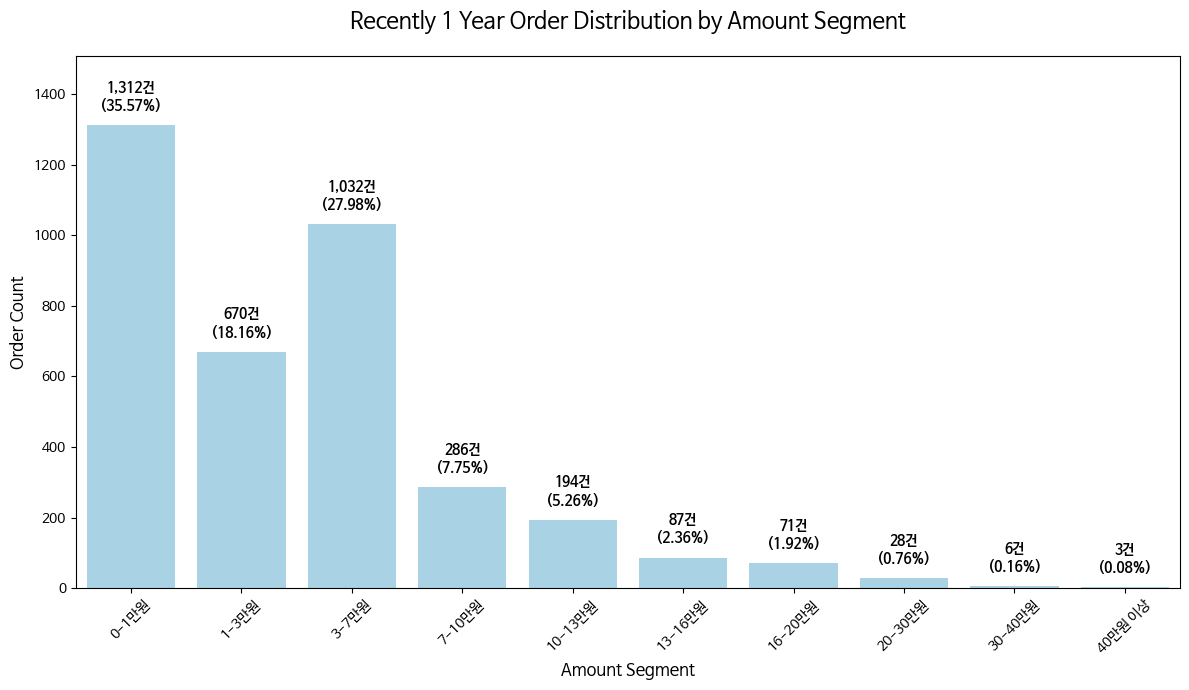

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')


# 1. 최근 1년 객단가 시각화
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=segment_1y, x='금액구간', y='주문건수', color='skyblue', alpha=0.8)

# 차트 제목 및 라벨 설정
plt.title('Recently 1 Year Order Distribution by Amount Segment', fontsize=16, pad=20)
plt.xlabel('Amount Segment', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=45)

# 바 상단에 비중(%) 라벨 표시
for i, p in enumerate(ax.patches):
    count = segment_1y.iloc[i]['주문건수']
    percent = segment_1y.iloc[i]['비중(%)']

    # f-string을 사용하여 건수와 비중을 결합 (콤마 포맷팅 포함)
    label = f"{int(count):,}건\n({percent}%)"

    ax.annotate(label,
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom',
                 fontsize=10,
                 fontweight='bold',
                 xytext=(0, 8),
                 textcoords='offset points')

# y축 범위를 텍스트가 잘리지 않게 살짝 높임
plt.ylim(0, segment_1y['주문건수'].max() * 1.15)


plt.tight_layout()
plt.savefig('aov_distribution.png')
plt.show()